## Alucar - Analisando as Vendas

In [4]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
import seaborn as sns
import matplotlib.pyplot as plt
import os.path

%matplotlib inline

In [5]:
ROOT_DIR = os.path.dirname(os.path.abspath( '.' ))
DATA_DIR = os.path.join(ROOT_DIR, 'data')
PROCESSED_DIR = os.path.join(DATA_DIR, 'processed')

In [6]:
alucar = pd.read_csv(os.path.join(PROCESSED_DIR, 'alucar.csv'))

In [7]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [8]:
print('Quantidade de linhas e colunas:', alucar.shape)

Quantidade de linhas e colunas: (24, 2)


In [9]:
print('Quantidade de Dados Nulos:', alucar.isnull().sum().sum())

Quantidade de Dados Nulos: 0


In [10]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [11]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [12]:
print(sns.__version__)

0.9.0


### Gráficos

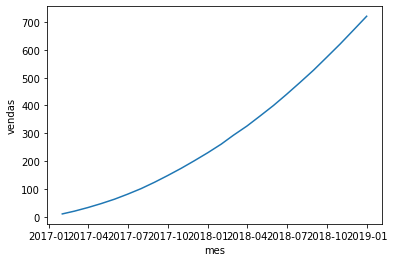

In [13]:
sns.lineplot(x='mes', y='vendas', data=alucar);


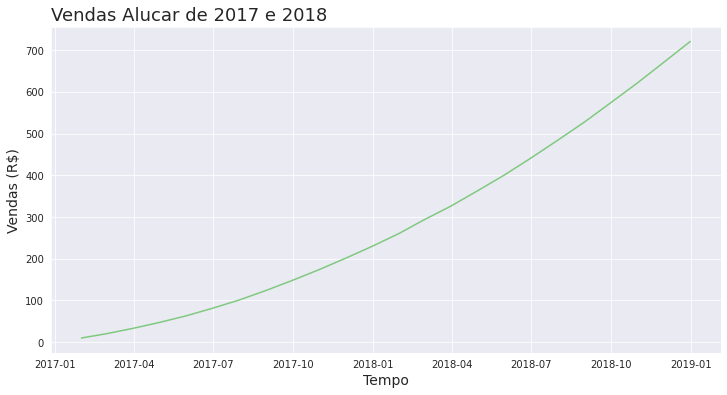

In [14]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14);

In [15]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


### Decomposição das Vendas

In [16]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


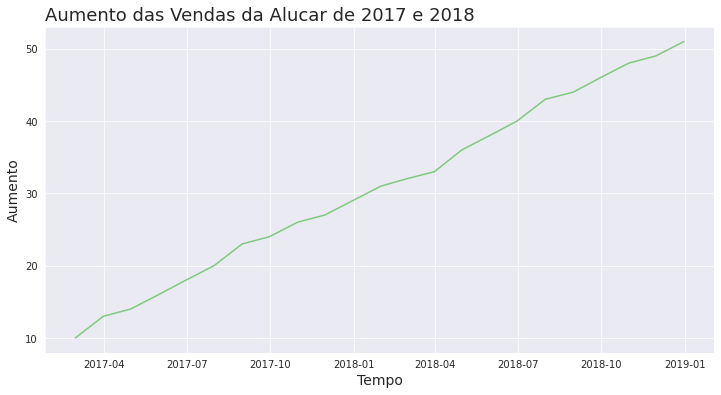

In [17]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento das Vendas da Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento', fontsize=14);

In [18]:
def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14);

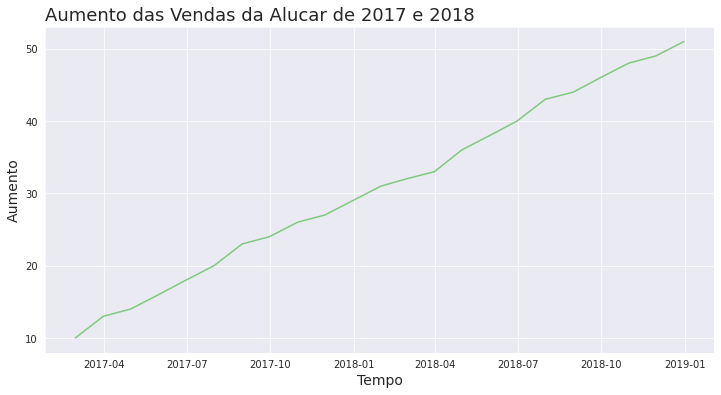

In [19]:
titulo = 'Aumento das Vendas da Alucar de 2017 e 2018'
labelx = 'Tempo'
labely = 'Aumento'
x = 'mes'
y = 'aumento'
dataset = alucar
plotar(titulo, labelx, labely, x, y, dataset)

In [20]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


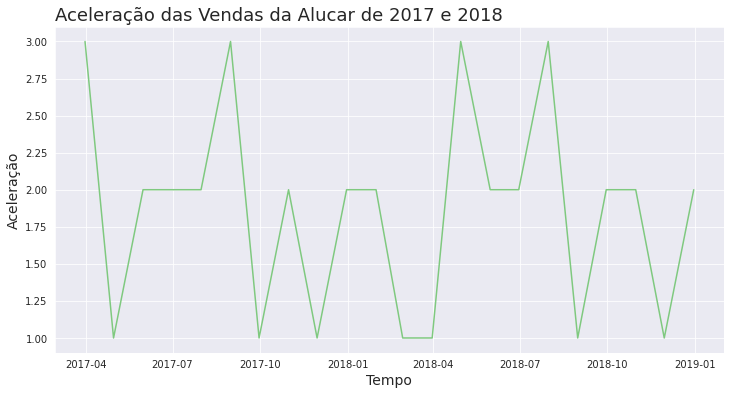

In [21]:
titulo = 'Aceleração das Vendas da Alucar de 2017 e 2018'
labelx = 'Tempo'
labely = 'Aceleração'
x = 'mes'
y = 'aceleracao'
dataset = alucar
plotar(titulo, labelx, labely, x, y, dataset)

### Observação e Tendência

In [22]:
def plot_comparacao(x, y1, y2, y3, dataset, title):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3, 1, 1)
    sns.lineplot(x=x, y=y1, data=dataset)
    ax.set_title(title, fontsize=18, loc='left')

    plt.subplot(3, 1, 2)
    sns.lineplot(x=x, y=y2, data=dataset)

    plt.subplot(3, 1, 3)
    sns.lineplot(x=x, y=y3, data=dataset);

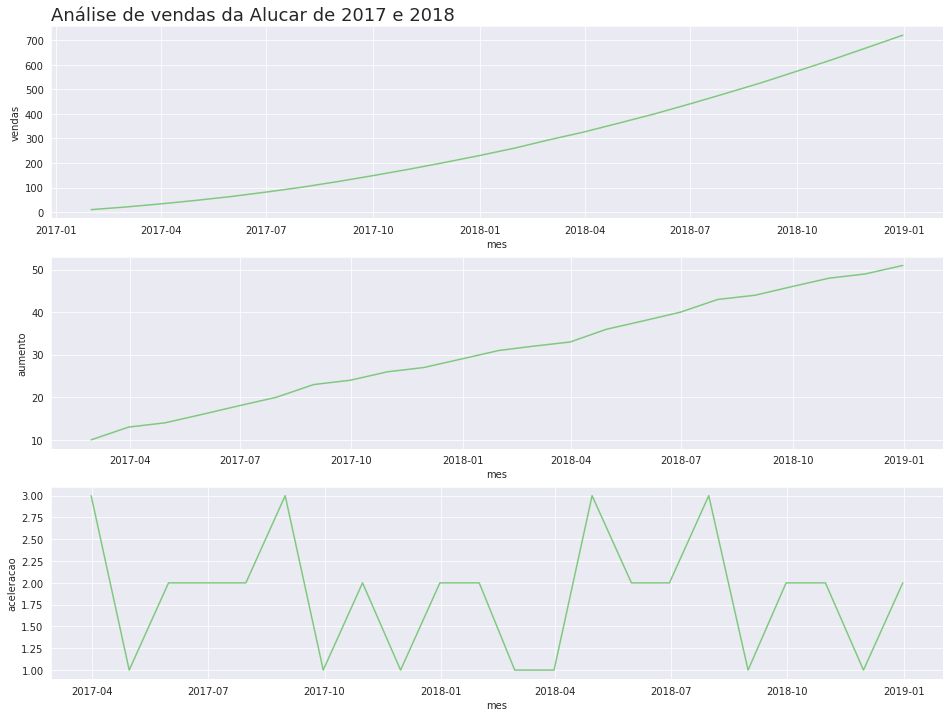

In [23]:
x = 'mes'
y1 = 'vendas'
y2 = 'aumento'
y3 = 'aceleracao'
title = 'Análise de vendas da Alucar de 2017 e 2018'
dataset = alucar
plot_comparacao(x, y1, y2, y3, dataset, title)

### Autocorrelação

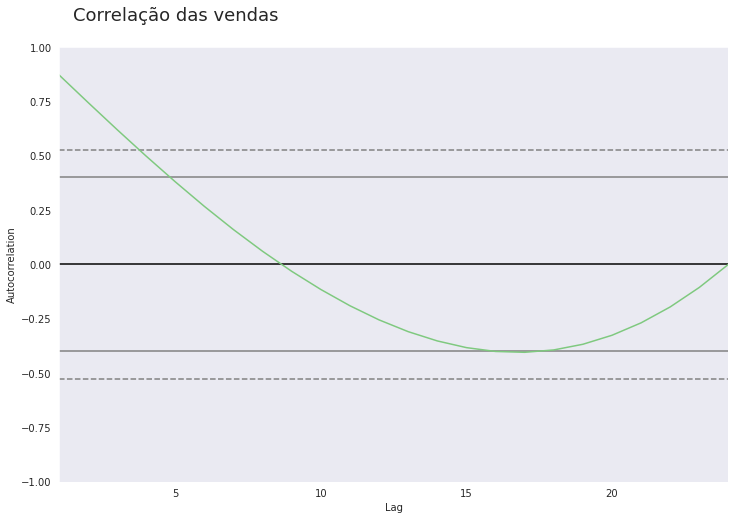

In [24]:
ax = plt.figure(figsize=(12,8))
ax.suptitle('Correlação das vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['vendas']);

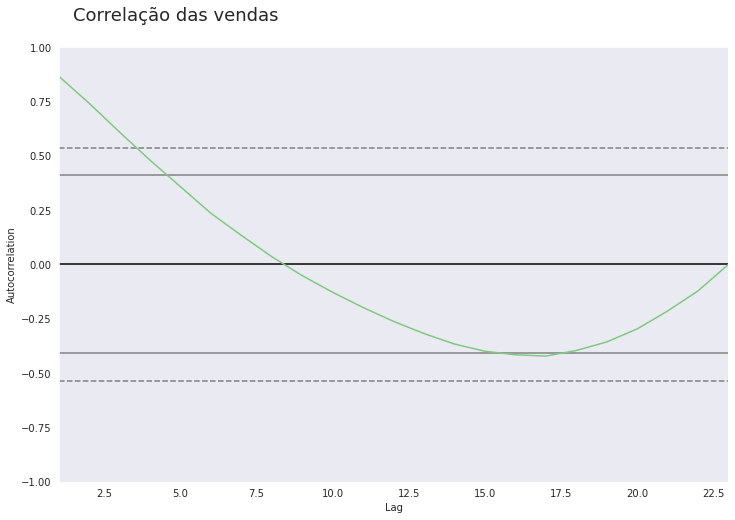

In [25]:
ax = plt.figure(figsize=(12,8))
ax.suptitle('Correlação das vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aumento'][1:]);

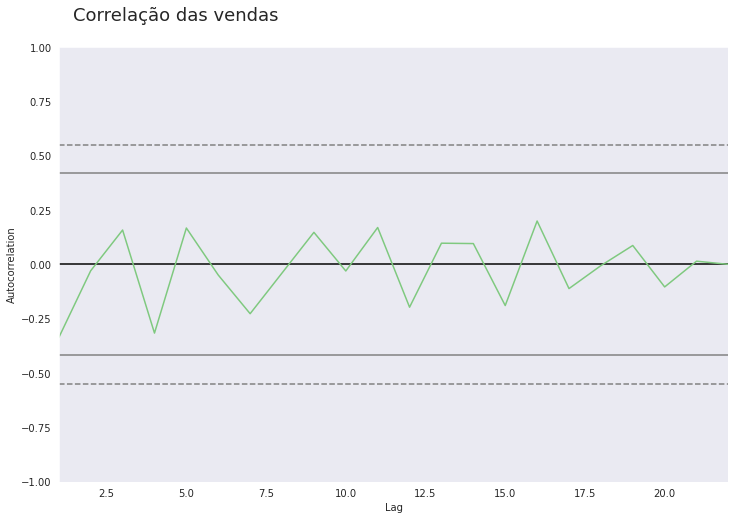

In [26]:
ax = plt.figure(figsize=(12,8))
ax.suptitle('Correlação das vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:]);

## Alucar - Análise de assinaturas da newsletter

In [27]:
assinantes = pd.read_csv(os.path.join(PROCESSED_DIR, 'newsletter_alucar.csv'))

In [28]:
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [29]:
print('Quantidade de linhas e colunas:', assinantes.shape)
print('Quantidade de Dados Nulos:', assinantes.isnull().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de Dados Nulos: 0


In [30]:
assinantes.dtypes

mes           datetime64[ns]
vendas                 int64
aumento              float64
aceleracao           float64
dtype: object

In [44]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
aumento              float64
aceleracao           float64
dtype: object

In [45]:
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


In [46]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


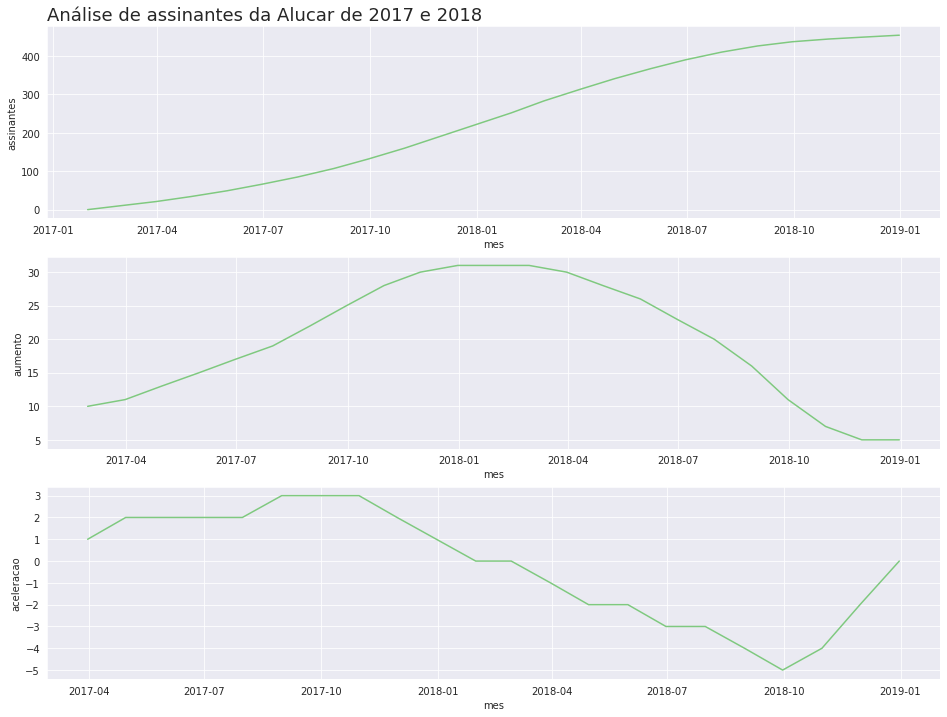

In [47]:
x = 'mes'
y1 = 'assinantes'
y2 = 'aumento'
y3 = 'aceleracao'
title = 'Análise de assinantes da Alucar de 2017 e 2018'
dataset = assinantes
plot_comparacao(x, y1, y2, y3, dataset, title)

## Chocolura - Análise de vendas

In [48]:
chocolura = pd.read_csv(os.path.join(PROCESSED_DIR, 'chocolura.csv'))

In [49]:
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [50]:
print('Quantidade de linhas e colunas:', chocolura.shape)
print('Quantidade de Dados Nulos:', chocolura.isnull().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de Dados Nulos: 0


In [51]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [52]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [53]:
chocolura.head()

,mes,vendas
0,2017-01-01,210
1,2017-02-01,185
2,2017-03-01,209
3,2017-04-01,280
4,2017-05-01,211


In [55]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


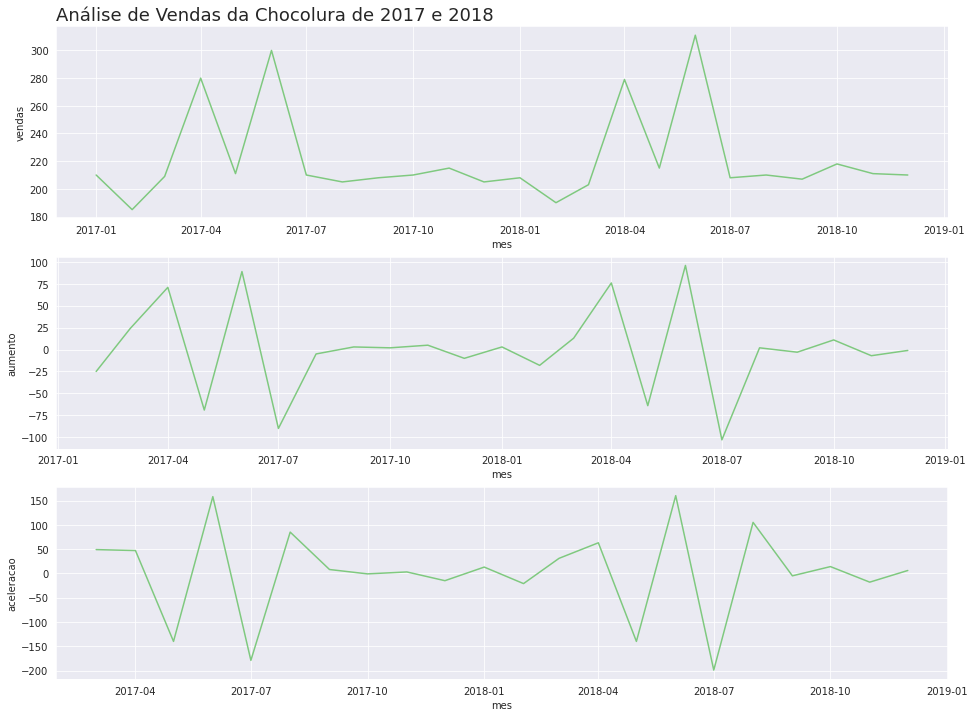

In [57]:
x = 'mes'
y1 = 'vendas'
y2 = 'aumento'
y3 = 'aceleracao'
title = 'Análise de Vendas da Chocolura de 2017 e 2018'
dataset = chocolura
plot_comparacao(x, y1, y2, y3, dataset, title)

## Chocolura - Vendas diários (Outubro e Novembro)

In [58]:
vendas_por_dia = pd.read_csv(os.path.join(PROCESSED_DIR, 'vendas_por_dia.csv'))

In [59]:
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [60]:
print('Quantidade de linhas e colunas:', vendas_por_dia.shape)
print('Quantidade de Dados Nulos:', vendas_por_dia.isnull().sum().sum())

Quantidade de linhas e colunas: (61, 2)
Quantidade de Dados Nulos: 0


In [61]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [63]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [53]:
chocolura.head()

,mes,vendas
0,2017-01-01,210
1,2017-02-01,185
2,2017-03-01,209
3,2017-04-01,280
4,2017-05-01,211


In [64]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


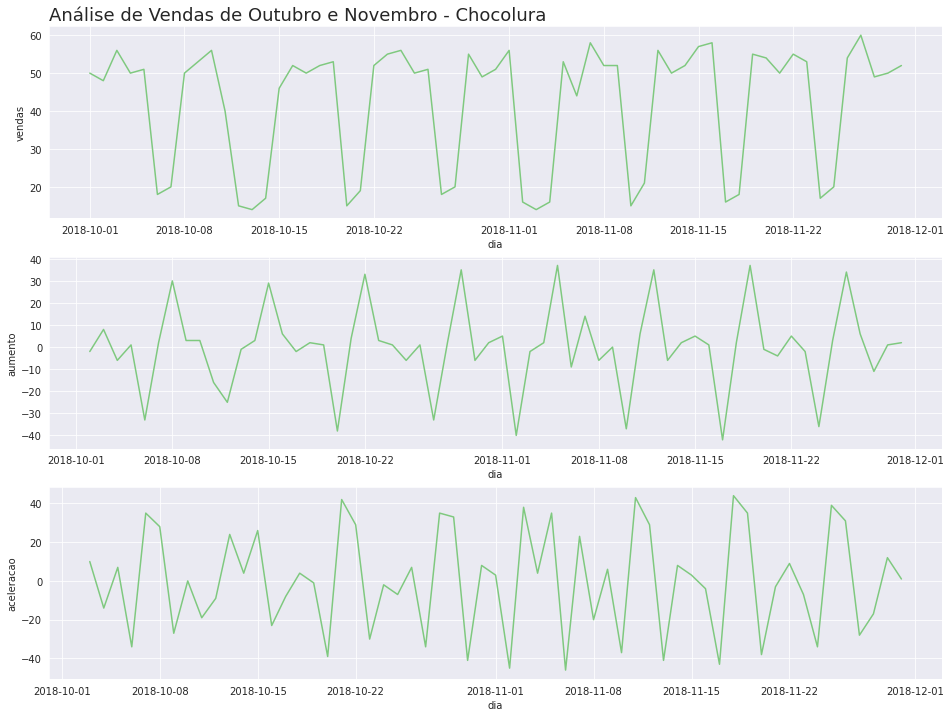

In [66]:
x = 'dia'
y1 = 'vendas'
y2 = 'aumento'
y3 = 'aceleracao'
title = 'Análise de Vendas de Outubro e Novembro - Chocolura'
dataset = vendas_por_dia
plot_comparacao(x, y1, y2, y3, dataset, title)

**Analisando a sazonalidade**

In [82]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [83]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [84]:
dias_traduzidos = {
    'Monday': 'Segunda',
    'Tuesday': 'Terca',
    'Wednesday': 'Quarta',
    'Thursday': 'Quinta',
    'Friday': 'Sexta',
    'Saturday': 'Sabado',
    'Sunday': 'Domingo'
}

vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)
vendas_por_dia.head(14)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terca
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sabado
6,2018-10-07,20,2.0,35.0,Domingo
7,2018-10-08,50,30.0,28.0,Segunda
8,2018-10-09,53,3.0,-27.0,Terca
9,2018-10-10,56,3.0,0.0,Quarta


**Agrupando os dias**

In [88]:
vendas_agrupadas = vendas_por_dia.groupby(['dia_da_semana'])[['vendas', 'aumento', 'aceleracao']].mean().round()

In [89]:
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Sabado,16.0,-28.0,-20.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Terca,52.0,-1.0,-34.0
